In [13]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.
class_names = ['Koszulka', 'Spodnie', 'Sweter', 'Sukienka', 'Płaszcz', 'Sandał', 'Koszula', 'Tenisówka', 'Torebka', 'Trzewik']

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5536 - accuracy: 0.8078 - val_loss: 0.3911 - val_accuracy: 0.8592
Epoch 2/20
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4059 - accuracy: 0.8566 - val_loss: 0.3581 - val_accuracy: 0.8684
Epoch 3/20
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3665 - accuracy: 0.8687 - val_loss: 0.3529 - val_accuracy: 0.8698
Epoch 4/20
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3426 - accuracy: 0.8764 - val_loss: 0.3307 - val_accuracy: 0.8774
Epoch 5/20
1719/1719 [==============================] - 16s 10ms/step - loss: 0.3195 - accuracy: 0.8850 - val_loss: 0.3252 - val_accuracy: 0.8780
Epoch 6/20
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3041 - accuracy: 0.8901 - val_loss: 0.3200 - val_accuracy: 0.8814
Epoch 7/20
1719/1719 [==============================] - 16s 10ms/step - loss: 0.2905 - accuracy: 0.8949 - val_loss: 0.3087 - va

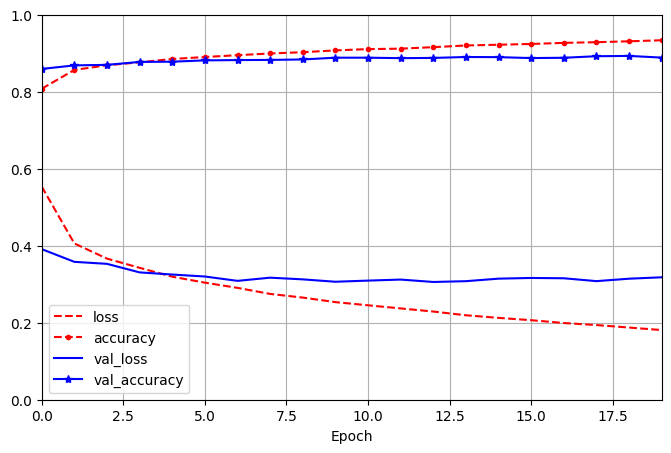

In [17]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 19], ylim=[0, 1], grid=True, xlabel='Epoch', style=['r--', 'r--.', 'b-', 'b-*']
)
plt.show()

BN before activations

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, kernel_initializer='he_normal', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(100, kernel_initializer='he_normal', use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 10s 5ms/step - loss: 0.6010 - accuracy: 0.7978 - val_loss: 0.4185 - val_accuracy: 0.8458
Epoch 2/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4221 - accuracy: 0.8528 - val_loss: 0.3774 - val_accuracy: 0.8620
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3740 - accuracy: 0.8681 - val_loss: 0.3545 - val_accuracy: 0.8714
Epoch 4/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3447 - accuracy: 0.8781 - val_loss: 0.3349 - val_accuracy: 0.8778
Epoch 5/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3235 - accuracy: 0.8851 - val_loss: 0.3375 - val_accuracy: 0.8760
Epoch 6/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3057 - accuracy: 0.8908 - val_loss: 0.3269 - val_accuracy: 0.8804
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2925 - accuracy: 0.8949 - val_loss: 0.3209 - val_accuracy

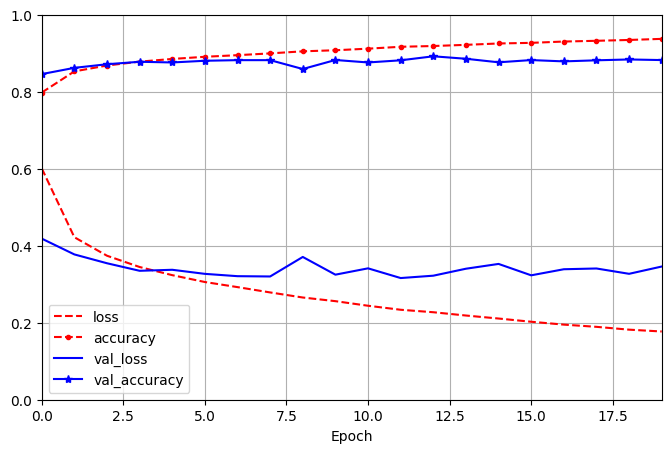

In [20]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 19], ylim=[0, 1], grid=True, xlabel='Epoch', style=['r--', 'r--.', 'b-', 'b-*']
)
plt.show()